In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from abstraction import Visualizations, Features, Model

<div style="font-weight: bold; color: green; font-size: 30px; text-align: center">Do the Visualizations All Work?</div>

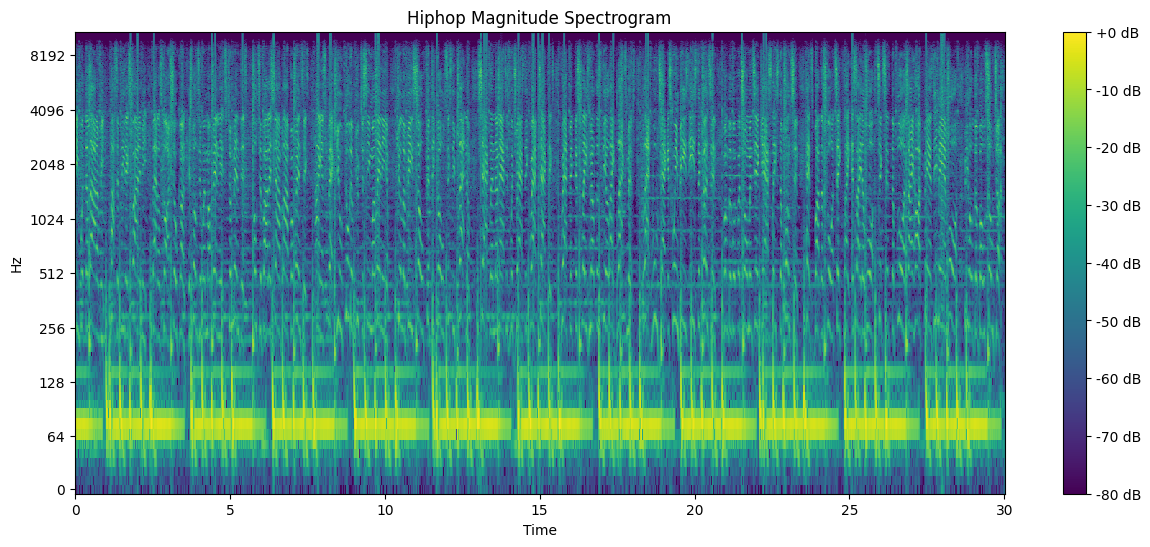

In [2]:
# Instantiate Module
visual = Visualizations()
# Plot Magnitude Spectrogram
visual.plot_mag_spec(filepath="Data/genres_original/hiphop/hiphop.00001.wav", genre="hiphop")

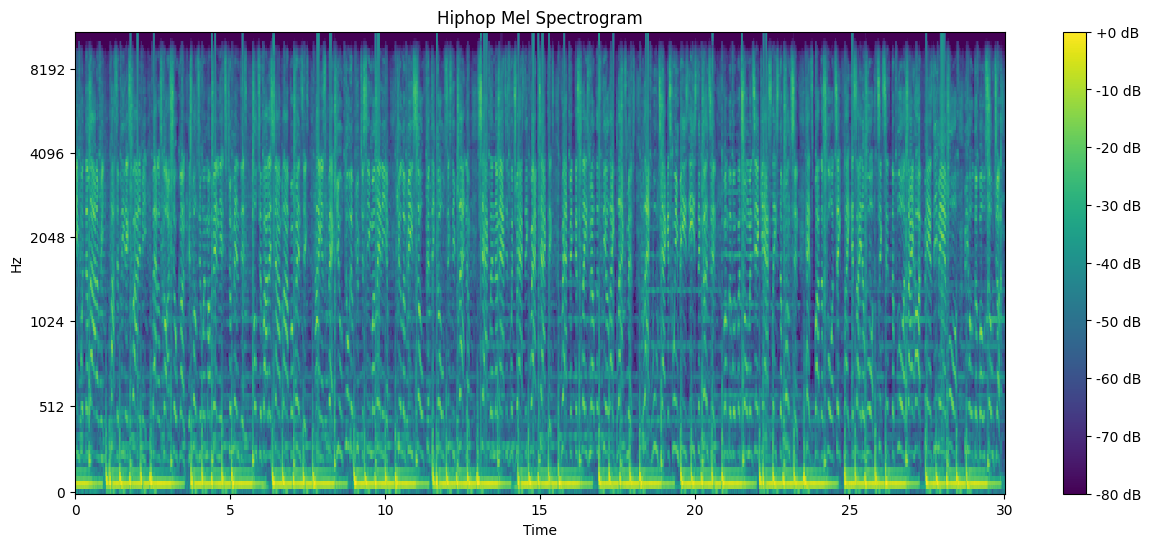

In [3]:
# Plot Mel Spectrogram
visual.plot_mel_spec(filepath="Data/genres_original/hiphop/hiphop.00001.wav", genre="hiphop")

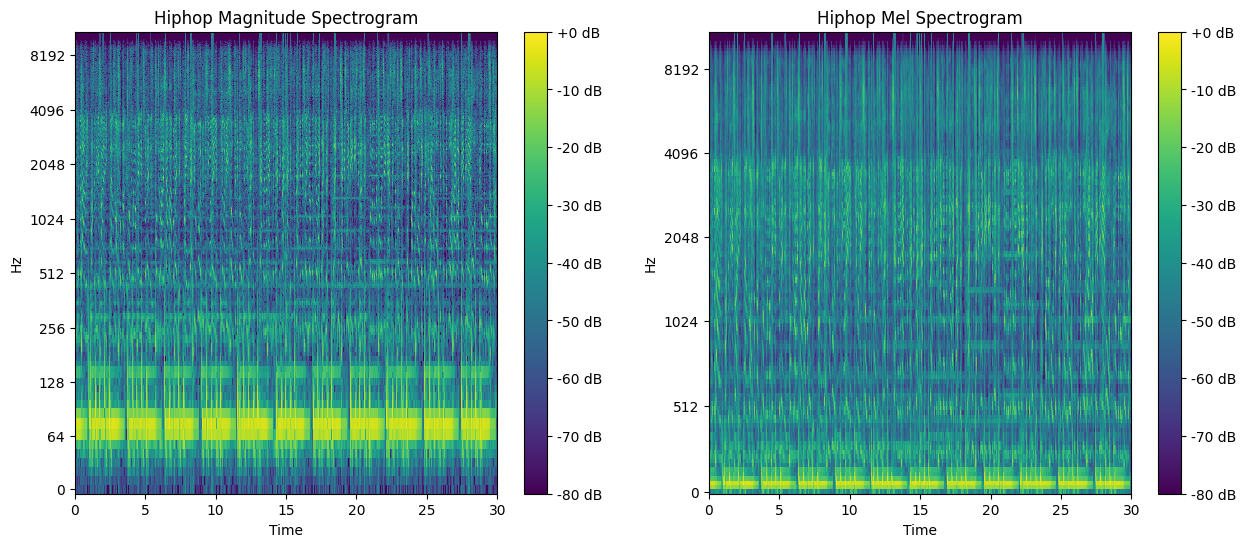

In [4]:
# Plot Magnitude vs Mel Spectrogram Comparisions for One Genre
visual.plot_comparison_specs(filepath="Data/genres_original/hiphop/hiphop.00001.wav", genre="hiphop")

<div style="font-weight: bold; color: red; font-size: 20px">Feature Visualizations</div>

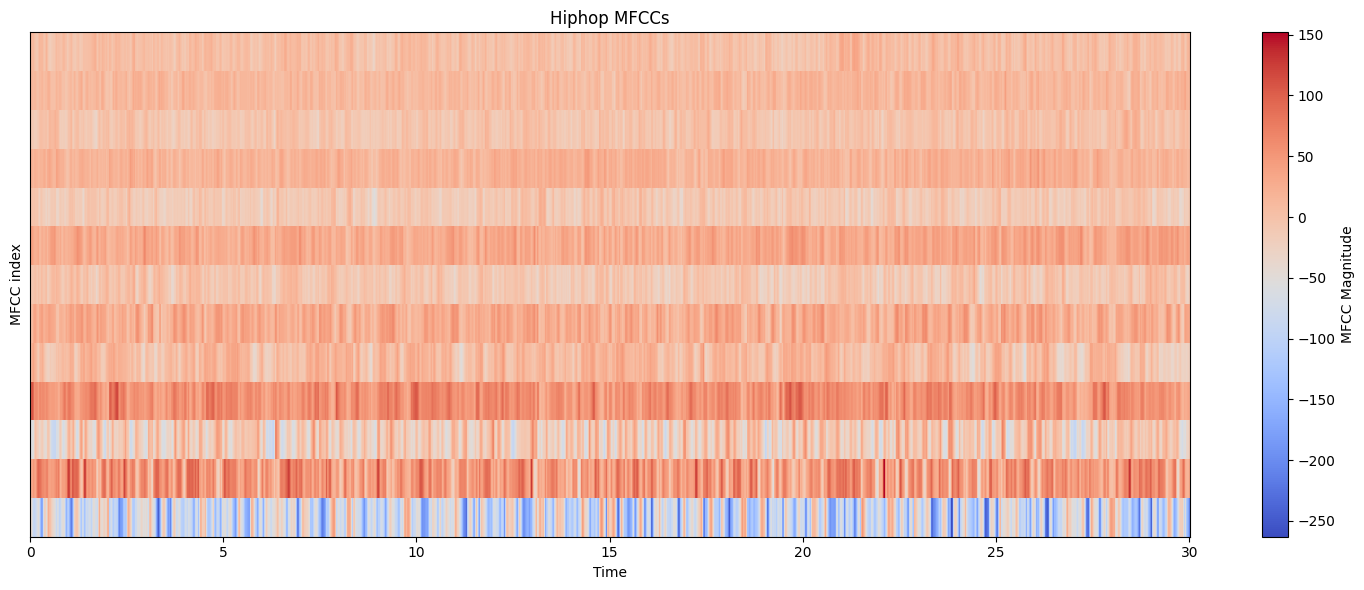

In [5]:
# Plot Mel-Frequency Cepstral Coefficients(MFCCs)
visual.plot_mfccs(filepath="Data/genres_original/hiphop/hiphop.00001.wav", genre="hiphop")

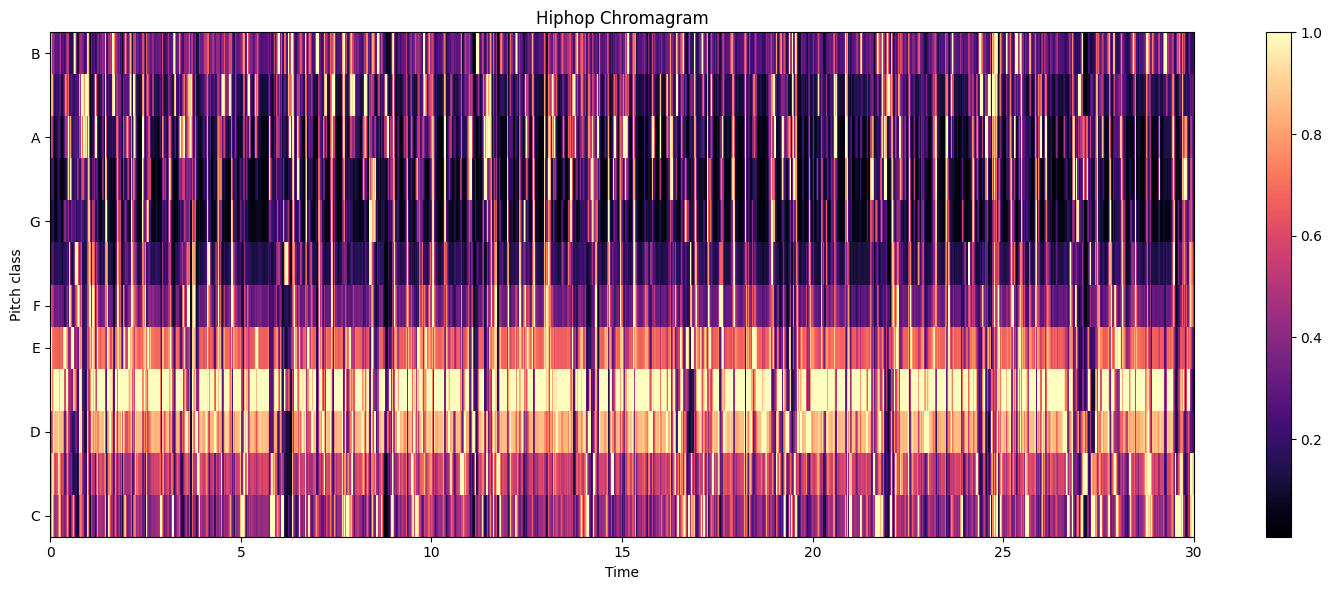

In [6]:
# Plot Chromagram
visual.plot_chroma_stft(filepath="Data/genres_original/hiphop/hiphop.00001.wav", genre="hiphop")

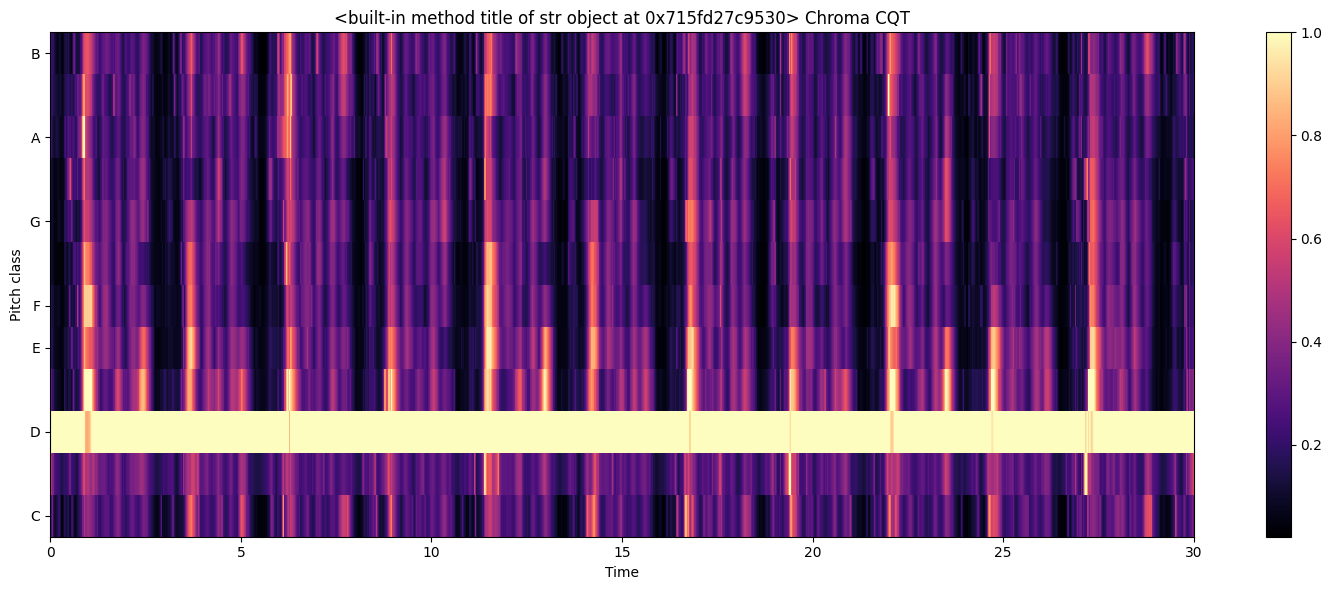

In [7]:
# Plot Chroma Constant-Q Transform feature
visual.plot_chroma_cqt(filepath="Data/genres_original/hiphop/hiphop.00001.wav", genre="hiphop")

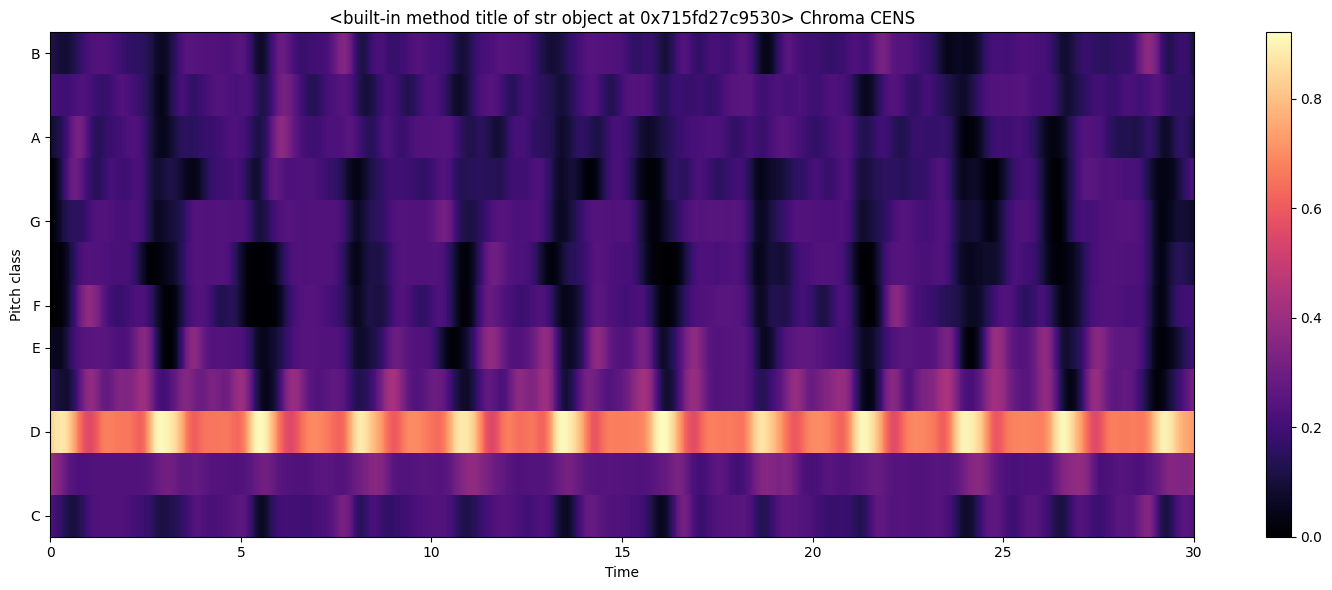

In [8]:
# Plot Chroma Energy Normalized Statistics(chroma_cens)
visual.plot_chroma_cens(filepath="Data/genres_original/hiphop/hiphop.00001.wav", genre="hiphop")

<div style="font-weight: bold; color: green; font-size: 30px; text-align: center">Does the Feature Class Function as Expected?</div>

In [9]:
# Paths to variables
blues_files = glob("../audio-ml/Data/genres_original/blues/blues.*.wav")

classical_files = glob("../audio-ml/Data/genres_original/classical/classical.*.wav")

country_files = glob("../audio-ml/Data/genres_original/country/country.*.wav")

disco_files = glob("../audio-ml/Data/genres_original/disco/disco.*.wav")

hiphop_files = glob("../audio-ml/Data/genres_original/hiphop/hiphop.*.wav")

jazz_files = glob("../audio-ml/Data/genres_original/jazz/jazz.*.wav")

metal_files = glob("../audio-ml/Data/genres_original/metal/metal.*.wav")

pop_files = glob("../audio-ml/Data/genres_original/pop/pop.*.wav")

reggae_files = glob("../audio-ml/Data/genres_original/reggae/reggae.*.wav")

rock_files = glob("../audio-ml/Data/genres_original/rock/rock.*.wav")

In [10]:
# Create a (path, genre) list of all audio files
file_list = []
# Iteration
for path in classical_files:
    file_list.append((path, "classical"))
for path in blues_files:
    file_list.append((path, "blues"))
for path in country_files:
    file_list.append((path, "country"))
for path in disco_files:
    file_list.append((path, "disco"))
for path in hiphop_files:
    file_list.append((path, "hiphop"))
for path in jazz_files:
    file_list.append((path, "jazz"))
for path in metal_files:
    file_list.append((path, "metal"))
for path in pop_files:
    file_list.append((path, "pop"))
for path in reggae_files:
    file_list.append((path, "reggae"))
for path in rock_files:
    file_list.append((path, "rock"))

In [11]:
# Instantiate features class
feature = Features(file_list=file_list)

In [12]:
# Feature Extraction
feature.extract_features("audio_features2.csv")

 54%|█████████████████████▋                  | 541/1000 [08:05<07:55,  1.04s/it]/home/kelvin/My-Code/Python/ml-and-ai-projects/audio-ml/functions.py:298: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/kelvin/myenv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing ../audio-ml/Data/genres_original/jazz/jazz.00054.wav: 


100%|███████████████████████████████████████| 1000/1000 [14:42<00:00,  1.13it/s]


<div style="font-weight: bold; color: green; font-size: 30px; text-align: center">Does the Model Class Function as Expected?</div>

In [13]:
# Instantiate Model class
model = Model("./audio_features2.csv")

In [15]:
# Make predictions
predictions = model.make_predictions()

In [16]:
predictions

array(['classical', 'blues', 'metal', 'jazz', 'rock', 'country', 'rock',
       'country', 'hiphop', 'jazz', 'blues', 'blues', 'country', 'blues',
       'rock', 'disco', 'reggae', 'jazz', 'disco', 'country', 'country',
       'metal', 'blues', 'jazz', 'blues', 'jazz', 'pop', 'reggae', 'jazz',
       'jazz', 'metal', 'country', 'jazz', 'hiphop', 'jazz', 'metal',
       'rock', 'hiphop', 'country', 'disco', 'reggae', 'metal', 'pop',
       'blues', 'jazz', 'classical', 'metal', 'classical', 'hiphop',
       'pop', 'rock', 'metal', 'hiphop', 'jazz', 'reggae', 'disco',
       'disco', 'classical', 'classical', 'hiphop', 'metal', 'reggae',
       'reggae', 'rock', 'disco', 'rock', 'rock', 'classical', 'rock',
       'pop', 'rock', 'reggae', 'classical', 'pop', 'reggae', 'hiphop',
       'blues', 'pop', 'pop', 'pop', 'disco', 'pop', 'rock', 'hiphop',
       'jazz', 'rock', 'reggae', 'hiphop', 'country', 'jazz', 'metal',
       'reggae', 'rock', 'disco', 'country', 'jazz', 'jazz', 'country',

--- Model Evaluation on Test Set ---
Final Accuracy: 0.825

Final Classification Report:
               precision    recall  f1-score   support

       blues       0.89      0.85      0.87        20
   classical       0.86      0.90      0.88        20
     country       0.76      0.95      0.84        20
       disco       0.80      0.80      0.80        20
      hiphop       0.85      0.85      0.85        20
        jazz       0.86      0.95      0.90        20
       metal       0.94      0.85      0.89        20
         pop       0.88      0.75      0.81        20
      reggae       0.93      0.65      0.76        20
        rock       0.58      0.70      0.64        20

    accuracy                           0.82       200
   macro avg       0.84      0.82      0.83       200
weighted avg       0.84      0.82      0.83       200



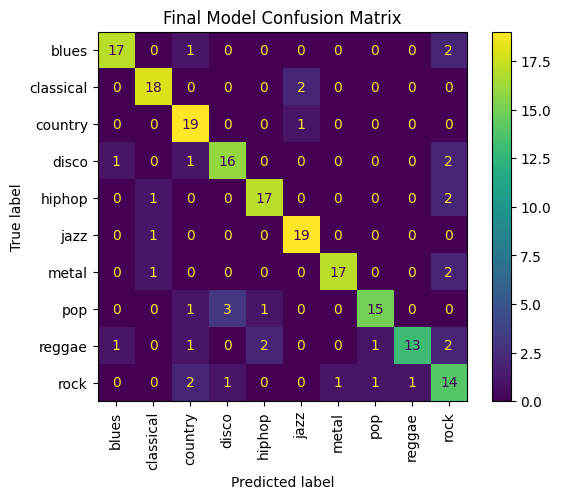

In [17]:
# Evaluate model
model.evaluate_model()